# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# convert unix date Google search for "unix date converter python"
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Add units to convert temp measurements from Kelvin to Farenheit
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['weather'][0]['description']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_clouds_num = city_weather_json['clouds']['all']

        #Time returned in Unix, convert to readable (ChatGPT)
        city_date = datetime.fromtimestamp(city_weather_json['dt']).strftime('%Y-%m-%d %H:%M:%S')


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Clouds (Numberic)": city_clouds_num})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | boyolangu
Processing Record 5 of Set 1 | lindley
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | ballina
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | bodo
Processing Record 15 of Set 1 | gunjur
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | arkhangel'sk
Processing Record 22 of Set 1 | papatowai
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City                 576
Lat                  576
Lng                  576
Max Temp             576
Humidity             576
Cloudiness           576
Wind Speed           576
Country              576
Date                 576
Clouds (Numberic)    576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Clouds (Numberic)
0,puerto natales,-51.7236,-72.4875,57.65,47,broken clouds,18.41,CL,2024-12-09 12:05:18,75
1,port elizabeth,-33.9180,25.5701,75.49,90,scattered clouds,6.91,ZA,2024-12-09 12:05:19,40
2,ust-nera,64.5667,143.2000,-6.74,99,overcast clouds,3.31,RU,2024-12-09 12:05:20,100
3,boyolangu,-8.1181,111.8935,77.52,91,overcast clouds,2.35,ID,2024-12-09 12:05:21,100
4,lindley,-27.8791,27.9135,78.49,21,clear sky,2.35,ZA,2024-12-09 12:05:22,2


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Clouds (Numberic)
City_ID,,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,57.65,47,broken clouds,18.41,CL,2024-12-09 12:05:18,75
1,port elizabeth,-33.9180,25.5701,75.49,90,scattered clouds,6.91,ZA,2024-12-09 12:05:19,40
2,ust-nera,64.5667,143.2000,-6.74,99,overcast clouds,3.31,RU,2024-12-09 12:05:20,100
3,boyolangu,-8.1181,111.8935,77.52,91,overcast clouds,2.35,ID,2024-12-09 12:05:21,100
4,lindley,-27.8791,27.9135,78.49,21,clear sky,2.35,ZA,2024-12-09 12:05:22,2


### Scatter Plots Correlation of Elements to Latitude

#### Latitude Vs. Temperature

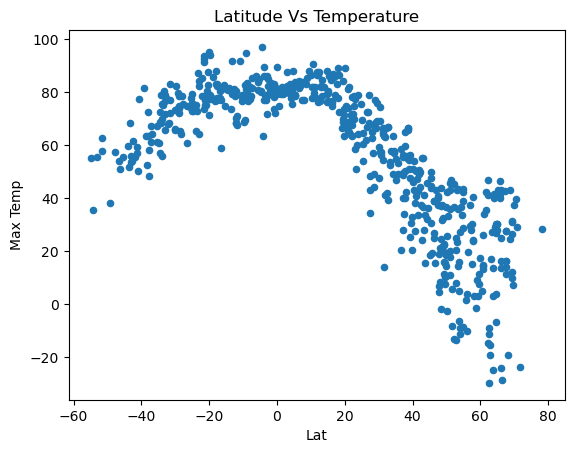

In [8]:
city_data_df.columns
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", title = "Latitude Vs Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

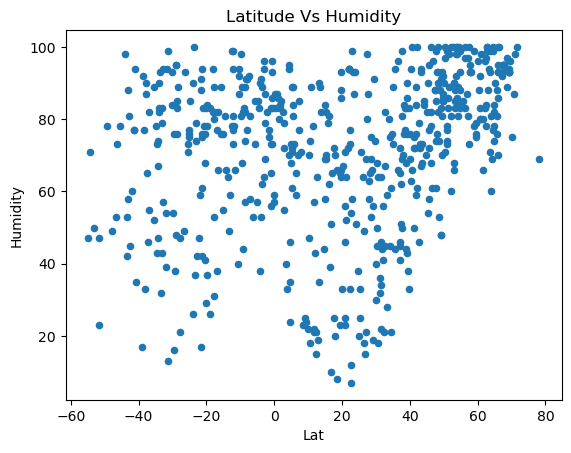

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", title = "Latitude Vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

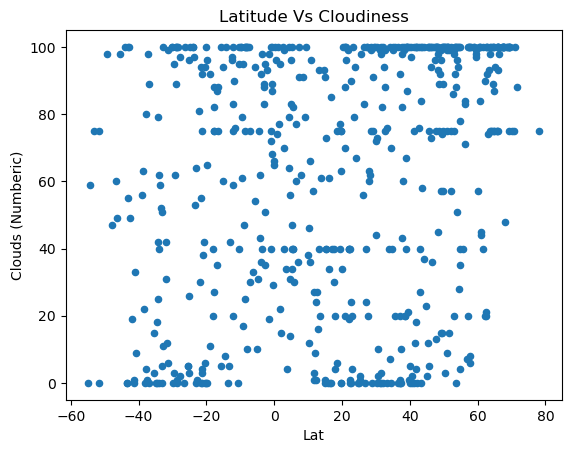

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Clouds (Numberic)", title = "Latitude Vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

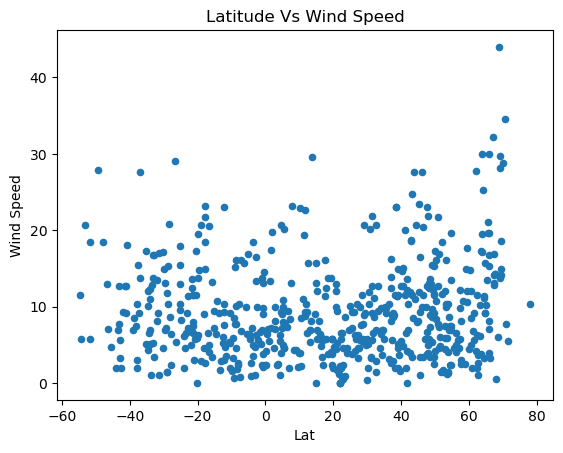

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", title = "Latitude Vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    # get data for x and y axis
    x = df[x_col]
    y = df[y_col]

    # linear regression equation
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # create the scatter plot
    plt.scatter(x, y, label='Data points', color='blue')

    # regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, label=f'Regression line (R² = {r_value**2:.2f})', color='red')

    # generate equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))




    # create equation placement on chart
    annotation_x = x.min() + (x.max() - x.min()) * 0.05  # 5% from the left
    annotation_y = y.max() - (y.max() - y.min()) * 0.1  # 10% from the top
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=12, color="red")
    

    # axis labels and titles
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Linear Regression: {y_col} vs {x_col}')
    plt.legend()
    plt.show()

     # Calculate and print the correlation coefficient
    correlation_coefficient = stats.pearsonr(x, y)[0]
    print(f"The correlation coefficient between {x_col} and {y_col} is {round(correlation_coefficient, 2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Clouds (Numberic)
City_ID,,,,,,,,,,
2,ust-nera,64.5667,143.2000,-6.74,99,overcast clouds,3.31,RU,2024-12-09 12:05:20,100
5,albany,42.6001,-73.9662,37.54,79,light rain,3.94,US,2024-12-09 12:05:24,100
9,st. john's,47.5649,-52.7093,40.96,88,overcast clouds,23.02,CA,2024-12-09 12:05:28,100
11,georgetown,5.4112,100.3354,78.73,84,light rain,4.61,MY,2024-12-09 12:05:31,40
13,bodo,67.2800,14.4050,42.84,92,moderate rain,32.21,NO,2024-12-09 12:05:33,100


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Clouds (Numberic)
City_ID,,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,57.65,47,broken clouds,18.41,CL,2024-12-09 12:05:18,75
1,port elizabeth,-33.9180,25.5701,75.49,90,scattered clouds,6.91,ZA,2024-12-09 12:05:19,40
3,boyolangu,-8.1181,111.8935,77.52,91,overcast clouds,2.35,ID,2024-12-09 12:05:21,100
4,lindley,-27.8791,27.9135,78.49,21,clear sky,2.35,ZA,2024-12-09 12:05:22,2
6,ushuaia,-54.8000,-68.3000,55.06,47,clear sky,11.50,AR,2024-12-09 12:00:28,0


In [15]:
north_count = northern_hemi_df['City'].nunique()
south_count = southern_hemi_df['City'].nunique()

print(f"The number of cities returned for the northern hemisphere is {north_count}")
print(f"The number of cities returned for the southern hemisphere is {south_count}")



The number of cities returned for the northern hemisphere is 387
The number of cities returned for the southern hemisphere is 189


###  Temperature vs. Latitude Linear Regression Plot

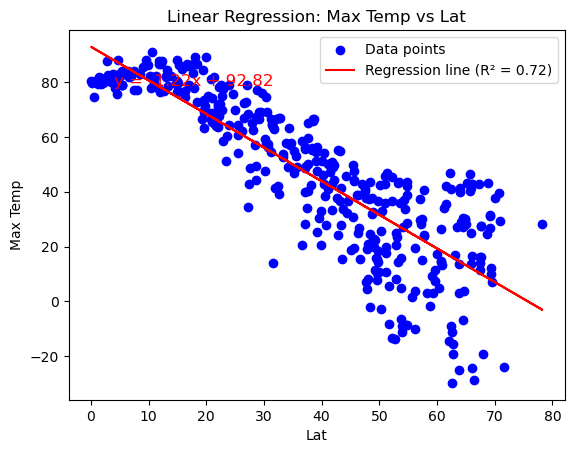

The correlation coefficient between Lat and Max Temp is -0.85


<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp")
plt.savefig("output_data/Fig5.png")

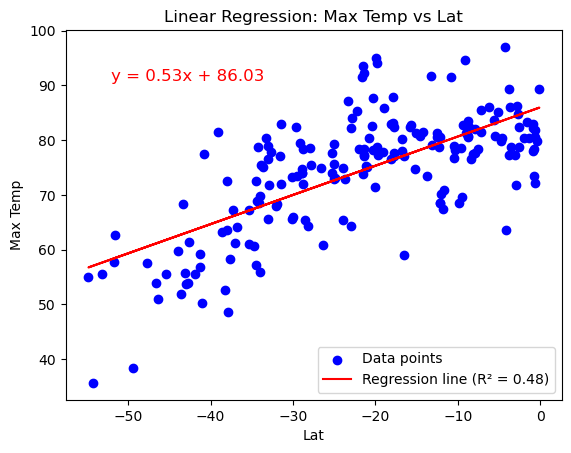

The correlation coefficient between Lat and Max Temp is 0.69


<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp")
plt.savefig("output_data/Fig6.png")

## Analysis of Correlation Between Latitude and Maximum Temperature

There is a strong negative correlation between latitude and maximum temperature in the northern hemisphere
and a modertate to strong postive correlation in the southern hemisphere.

The strong correlation in the northern hemisphere is shown by its r value (i.e. the correlation coefficient)
which is -0.85. The correlation coefficient is negative indicates a negative correlation. 

A negative correlation means that as the value of latitude increases the maximum temperature decreases

In the southern hemisphere, we see a moderate to strong correlation. This is indicated by the correlation coefficient of 0.69.
According to our class documentation 0.7 is the start of the range for a strong correlation and this is right there!
Because the correlation coefficient is positive, it indicates positive correlation. 

A positive correlation means that as the value of latitude increases the maximum temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

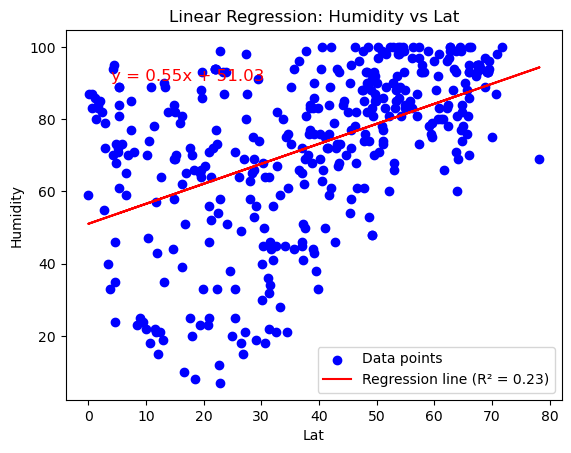

The correlation coefficient between Lat and Humidity is 0.48


<Figure size 640x480 with 0 Axes>

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity")
plt.savefig("output_data/Fig7.png")

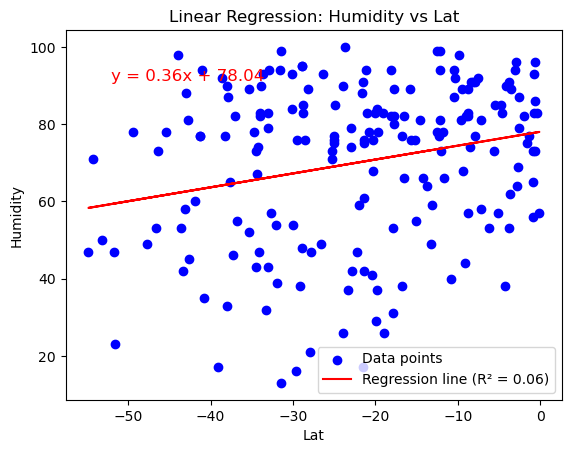

The correlation coefficient between Lat and Humidity is 0.24


<Figure size 640x480 with 0 Axes>

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity")
plt.savefig("output_data/Fig8.png")

## Analysis of Correlation Between Latitude and Humidity

There is a positive correlation in both the northern and southern hemispheres. The correlation in the northern hemisphere is weak. For the southern hemisphere it is very weak.

The positive correlation is indcated by the positive slope values.
The weak correlation is indicated by the correlation coefficients being less than 0.5.

This means that latitude may not be related to humidity.

### Cloudiness vs. Latitude Linear Regression Plot

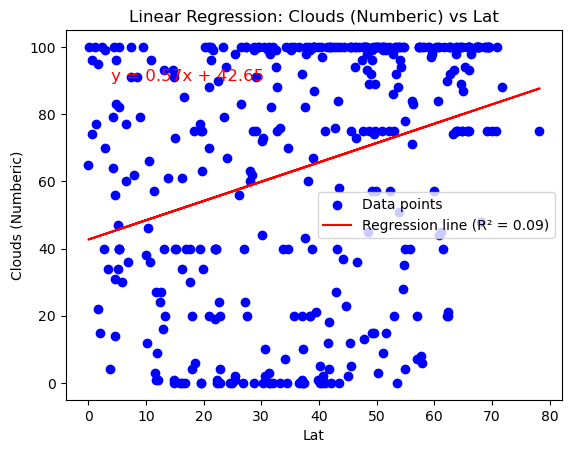

The correlation coefficient between Lat and Clouds (Numberic) is 0.31


<Figure size 640x480 with 0 Axes>

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Clouds (Numberic)")
plt.savefig("output_data/Fig9.png")

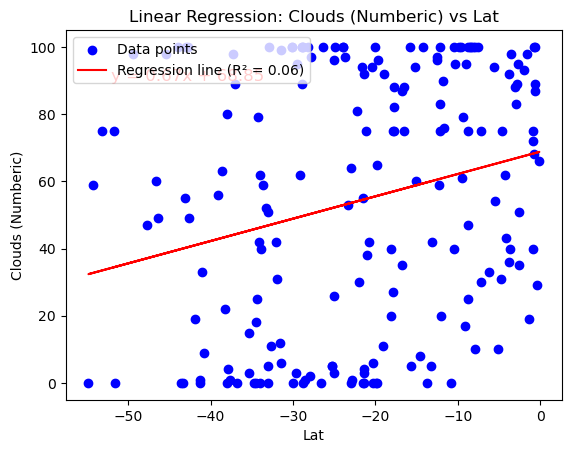

The correlation coefficient between Lat and Clouds (Numberic) is 0.24


<Figure size 640x480 with 0 Axes>

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Clouds (Numberic)")
plt.savefig("output_data/Fig10.png")

## Analysis of Correlation Between Latitude and Clouds

There is a very weak positive correlation between latitude and clouds in both
the northern and southern hemispheres. (Northern hemisphere is borderline very weak and weak with a correlation coefficient of 0.31)

The positive correlation is indcated by the positive slope values.
The very weak correlation is indicated by the correlation coefficients being close to 0.

This means that latitude may not be related to clouds.

### Wind Speed vs. Latitude Linear Regression Plot

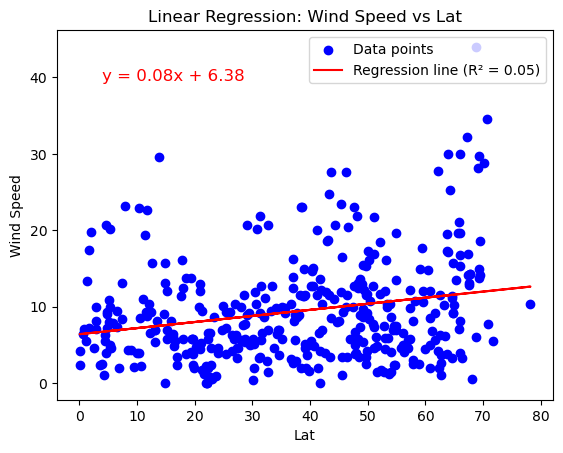

The correlation coefficient between Lat and Wind Speed is 0.23


<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed")
plt.savefig("output_data/Fig11.png")

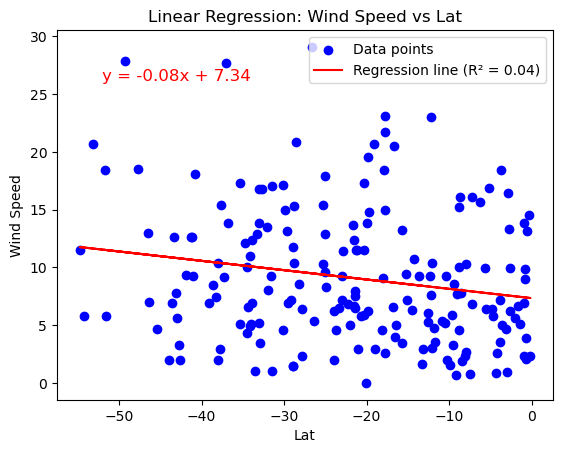

The correlation coefficient between Lat and Wind Speed is -0.19


<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed")
plt.savefig("output_data/Fig12.png")

## Analysis of Correlation between Wind Speed and Latitude

In the northern and southern hemispheres there is a very weak correlation between latitude and wind speed.
I

This means there is little correlation between latitude and windspeed.